In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from tqdm import tqdm

In [3]:
ds = xr.open_mfdataset("../era5/era5-nordics-solarradiation-monthly.nc")

In [4]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 111, month: 12)
Coordinates:
  * longitude  (longitude) float32 4.5 4.75 5.0 5.25 5.5 5.75 6.0 6.25 6.5 ...
  * latitude   (latitude) float32 71.5 71.25 71.0 70.75 70.5 70.25 70.0 ...
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    ssrd       (month, latitude, longitude) float32 dask.array<shape=(12, 73, 111), chunksize=(12, 73, 111)>

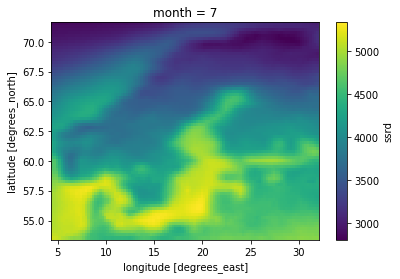

In [5]:
ds.ssrd[6].plot()

In [6]:
lons, lats = np.meshgrid(ds.longitude, ds.latitude)

In [7]:
lons

array([[ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       ...,
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ]], dtype=float32)

In [8]:
psr = xr.open_dataset("pine_spruce.nc")

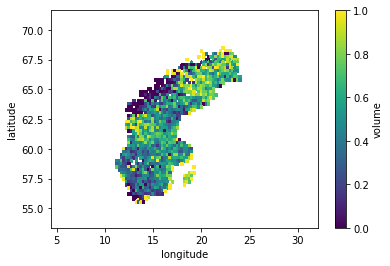

In [9]:
psr.volume.plot()

In [10]:
df = pd.DataFrame()

In [11]:
data = {
    "ratio": psr.volume.values.ravel()
}

In [12]:
data.keys()

dict_keys(['ratio'])

In [13]:
for m in range(0, 12):
    data["sr%02d" % (m + 1)] = ds.ssrd[m].values.ravel()

In [14]:
df = pd.DataFrame(data)

In [15]:
df.dropna(inplace=True)

In [16]:
df = df[df["ratio"] > 0]

In [17]:
df.columns[1:]

Index(['sr01', 'sr02', 'sr03', 'sr04', 'sr05', 'sr06', 'sr07', 'sr08', 'sr09',
       'sr10', 'sr11', 'sr12'],
      dtype='object')

In [18]:
rf = RandomForestRegressor(n_estimators=500, max_depth=15)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df["ratio"])

In [20]:
X_train

,sr01,sr02,sr03,sr04,sr05,sr06,sr07,sr08,sr09,sr10,sr11,sr12
3931,630.024170,1265.449463,2774.316162,3820.463135,4120.383789,4396.432129,3859.923096,3614.154053,2875.280518,1464.265259,506.086639,325.236603
6150,984.504578,1560.939575,3042.134277,4318.443848,4679.091797,4946.440918,4278.289551,4205.517090,3475.773682,1746.319946,772.241577,596.083374
6587,962.012390,1559.416016,3044.806641,4186.606445,4586.783203,4700.436035,4198.530273,4098.072754,3397.971191,1740.826050,775.324585,607.812683
3922,630.739990,1284.213257,2793.415771,3911.511475,4301.236816,4418.686523,3814.813232,3594.031982,2821.760986,1519.286987,530.684692,336.123718
3479,530.465271,1161.132080,2649.135010,3762.267334,4080.385010,4153.865234,3737.784424,3432.779053,2499.049805,1315.335083,459.848297,283.256500
5370,857.010559,1443.427612,2960.188965,4032.166504,4523.187012,4588.278320,4198.026855,4047.008301,3261.187500,1649.604980,634.781067,525.998413
6361,951.084534,1552.627686,3084.596191,4198.072754,4694.063477,4810.494629,4299.011230,4212.449219,3488.825195,1794.651245,780.097656,598.824524
2830,441.462799,1031.581543,2561.352295,3665.692139,3967.197998,3968.222412,3552.422119,3323.960938,2512.322266,1235.892456,377.873871,201.913147
4708,792.594666,1395.331177,2904.311523,3972.849365,4337.244629,4369.601074,4085.627197,3812.072266,3105.513916,1592.808960,581.125427,445.865601
2280,367.363525,928.445557,2487.662842,3616.802246,3820.544678,3617.697510,3397.005615,3157.580566,2411.424561,1187.366821,327.944397,161.455734


In [21]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
y_pred = rf.predict(X_test)

In [23]:
mean_squared_error(y_test, y_pred)

0.051197110582065074

In [24]:
r2_score(y_test, y_pred)

0.2738970825084289

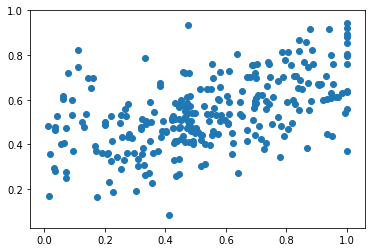

In [25]:
plt.scatter(y_test, y_pred)

In [26]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [27]:
df_results

,observed,predicted
3281,0.464295,0.551595
5383,0.804696,0.470572
5702,0.252497,0.532694
6254,0.458780,0.439527
2608,0.647202,0.534319
6256,0.170813,0.372124
5581,0.310723,0.335910
3936,0.434161,0.258785
2614,0.783765,0.813772
4476,0.932129,0.708534


In [28]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [29]:
feature_importances

,importance
sr12,0.129438
sr09,0.115421
sr03,0.112398
sr04,0.096970
sr06,0.096816
sr10,0.083973
sr07,0.069154
sr02,0.067928
sr11,0.067761
sr05,0.066722


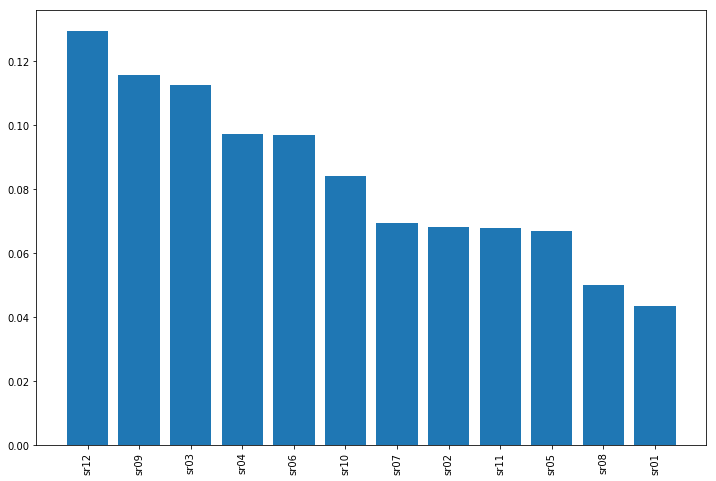

In [30]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()